<a href="https://colab.research.google.com/github/tasmia008/Bangla-text-sentimental-/blob/main/bangla_text_sentiment_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import nltk
import pandas
import re

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/sentiment_analysis_clean_data.csv')

In [ ]:
#data cleaning

In [ ]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent)
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)

    sent = sent.strip()
    return sent

In [ ]:
data.loc[15,'sentence']

'# ধন্যবাদ সায়েম ভাই শুভকামন আপনার পরিবার এর জন্য । পরবর্তী কোথায় টুর দেয়ার প্লান মাথায় ঘুরছে'

In [ ]:
for i, sent  in enumerate(data['sentence'].tolist()):
    data.loc[i,'clean_sentence'] = clean_sentence(sent)

In [ ]:
test = data.loc[15,'clean_sentence']
test

'ধন্যবাদ সায়েম ভাই শুভকামন আপনার পরিবার এর জন্য পরবর্তী কোথায় টুর দেয়ার প্লান মাথায় ঘুরছে'

In [ ]:
#Tokenized Sentence

In [ ]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [ ]:
#remove stop words

In [ ]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [ ]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : ধন্যবাদ সায়েম ভাই শুভকামন আপনার পরিবার এর জন্য পরবর্তী কোথায় টুর দেয়ার প্লান মাথায় ঘুরছে
after : ধন্যবাদ সায়েম ভাই শুভকামন পরিবার পরবর্তী কোথায় টুর দেয়ার প্লান মাথায় ঘুরছে


In [ ]:
data.isnull().value_counts()

Label  sentence  clean_sentence  clean_data
False  False     False           False         5603
                                 True             4
dtype: int64

In [ ]:
data['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in data['clean_sentence'].tolist()]
#del df['sentence']
data.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)

In [ ]:
data

,Label,sentence,clean_sentence,clean_data
0,0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",স্বাস্থ্যবান হতে চাই আমি বয়সের তুলনায় অনেক বেশ...,স্বাস্থ্যবান চাই বয়সের তুলনায় অনেক বেশি চিকন এ...
1,0,ভাইয়া নতুন ভিডিও আসে না কেন,ভাইয়া নতুন ভিডিও আসে না কেন,ভাইয়া নতুন ভিডিও আসে না
2,0,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না
3,2,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,ক্রিকেট বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ্রে...
4,1,আমিতো সেই ঝালপ্রিয়ো মানুষ,আমিতো সেই ঝালপ্রিয়ো মানুষ,আমিতো ঝালপ্রিয়ো মানুষ
...,...,...,...,...
5602,1,pos ওয়ও আমি গর্বিত বাঙ্গালি\n,ওয়ও আমি গর্বিত বাঙ্গালি,ওয়ও গর্বিত বাঙ্গালি
5603,2,neg বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারব...,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,বাংলাদেশ মানুষ নিজে করতে পারবেনা আর অন্যকে করত...
5604,2,neg রামোসের ঘুম আসে না\n,রামোসের ঘুম আসে না,রামোসের ঘুম আসে না
5605,1,pos কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি\n,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)


word_vectorizerGram.fit_transform(data['clean_data'])
stpGram = word_vectorizerGram.get_feature_names()

print(len(stpGram))

71089


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)

word_vectorizerGram_rsw.fit_transform(data['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()

print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[14])

71089
sample of bigram :  অংশ নেবেন


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
traindata = cv.fit_transform(data['clean_data'])
X = traindata
y = data.Label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=500)
knn =  KNeighborsClassifier()
xgb =xgb.XGBClassifier(n_estimators=500,
        colsample_bytree=0.5,
        max_depth =10)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)] #list of (str, estimator)

In [ ]:
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)

In [ ]:
stack_model.fit(X_train, Y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=500)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.5,
                                              max_depth=10,
                                              n_estimators=500))],
                   final_estimator=LogisticRegression())

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [ ]:
predictions = stack_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.32      0.04      0.06       198
           1       0.63      0.55      0.59       436
           2       0.57      0.84      0.68       488

    accuracy                           0.58      1122
   macro avg       0.51      0.47      0.44      1122
weighted avg       0.55      0.58      0.53      1122



In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=500,
max_samples=0.8,
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
bag_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=0)

In [ ]:
predictions = bag_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.26      0.14      0.18       198
           1       0.58      0.59      0.59       436
           2       0.59      0.70      0.64       488

    accuracy                           0.56      1122
   macro avg       0.48      0.47      0.47      1122
weighted avg       0.53      0.56      0.54      1122



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd



tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1, 2))
features = tfidf.fit_transform(data['clean_data'])

In [ ]:
y = data.Label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features,y, test_size = 0.20)

In [ ]:
stack_model.fit(X_train, Y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=500)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.5,
                                              max_depth=10,
                                              n_estimators=500))],
                   final_estimator=LogisticRegression())

In [ ]:
predictions = stack_model.predict(X_test)

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.42      0.05      0.09       215
           1       0.57      0.63      0.60       421
           2       0.59      0.77      0.66       486

    accuracy                           0.58      1122
   macro avg       0.53      0.48      0.45      1122
weighted avg       0.55      0.58      0.53      1122



In [ ]:
bag_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=0)

In [ ]:
predictions = bag_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.25      0.07      0.10       215
           1       0.56      0.60      0.58       421
           2       0.57      0.73      0.64       486

    accuracy                           0.55      1122
   macro avg       0.46      0.46      0.44      1122
weighted avg       0.51      0.55      0.51      1122



In [ ]:
from xgboost import XGBClassifier

x =XGBClassifier(max_depth=10,subsample=0.8,n_estimators=500,learning_rate=0.2,min_child_weight=1,random_state=4)

x.fit(X_train,Y_train)

XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=500,
              objective='multi:softprob', random_state=4, subsample=0.8)

In [ ]:
predictions = x.predict(X_test)

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.30      0.15      0.20       215
           1       0.60      0.57      0.58       421
           2       0.57      0.72      0.64       486

    accuracy                           0.55      1122
   macro avg       0.49      0.48      0.47      1122
weighted avg       0.53      0.55      0.53      1122



In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

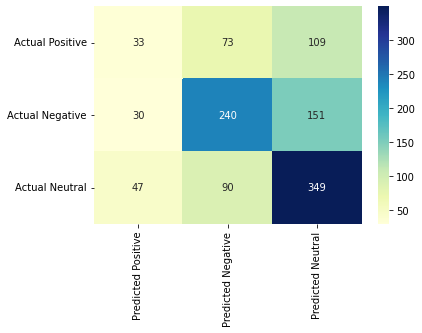

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted Positive', 'Predicted Negative','Predicted Neutral'], index = ['Actual Positive', 'Actual Negative','Actual Neutral'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

In [ ]:
print("Precision Score : ",precision_score(Y_test, predictions,

                                           average='micro'))

Precision Score :  0.5543672014260249


In [ ]:
print("Precision Score : ",recall_score(Y_test, predictions,

                                           average='micro'))

Precision Score :  0.5543672014260249


In [ ]:

print('F1 Score: %.3f' % accuracy_score(Y_test, predictions))

F1 Score: 0.554


In [ ]:
predictions = stack_model.predict(X_test)

In [ ]:
print("Precision Score : ",precision_score(Y_test, predictions,

                                           average='micro'))

Precision Score :  0.5775401069518716


In [ ]:
print("recall Score : ",recall_score(Y_test, predictions,

                                           average='micro'))

recall Score :  0.5775401069518716


In [ ]:
print('Accuracy Score: %.3f' % accuracy_score(Y_test, predictions))

Accuracy Score: 0.578
